In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data import get_data

df = get_data()

In [3]:
quantity_sold = df.groupby(["Product"])["Quantity"].sum().reset_index().sort_values("Quantity", ascending=False).reset_index(drop=True)
quantity_sold

,Product,Quantity
0,Mobile,6
1,Headphones,4
2,Laptop,4
3,Mouse,4
4,Keyboard,2


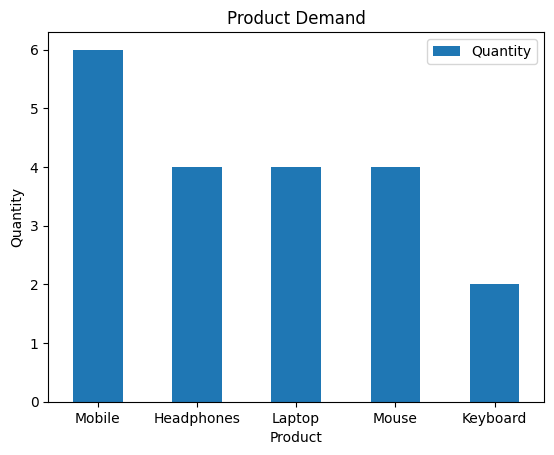

In [4]:
quantity_sold.plot(kind="bar", x="Product", y="Quantity", rot=0)
plt.xlabel("Product")
plt.ylabel("Quantity")
plt.title("Product Demand")
plt.show()

In [5]:
order_count = df["Product"].value_counts()
order_count


Product
Laptop        3
Mobile        3
Headphones    2
Keyboard      1
Mouse         1
Name: count, dtype: int64

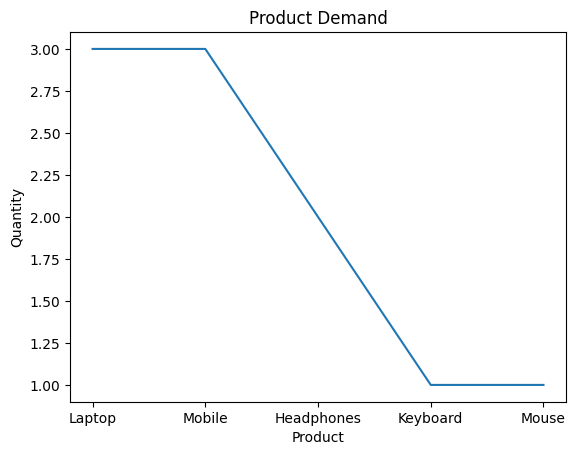

In [6]:
plt.plot(order_count.index, order_count.values)
plt.xlabel("Product")
plt.ylabel("Quantity")
plt.title("Product Demand")
plt.show()

Average Order Value

In [7]:
df["Revenue"] = df["Price"] * df["Quantity"]
df

,Order_ID,Date,Product,Category,Quantity,Price,Revenue
0,1001,2024-01-05,Laptop,Electronics,1,55000,55000
1,1002,2024-01-07,Mobile,Electronics,2,20000,40000
2,1003,2024-01-10,Headphones,Accessories,3,2000,6000
3,1004,2024-02-03,Laptop,Electronics,1,55000,55000
4,1005,2024-02-10,Mobile,Electronics,1,20000,20000
5,1006,2024-02-15,Keyboard,Accessories,2,1500,3000
6,1007,2024-03-01,Mobile,Electronics,3,20000,60000
7,1008,2024-03-05,Laptop,Electronics,2,55000,110000
8,1009,2024-03-10,Mouse,Accessories,4,800,3200
9,1010,2024-03-15,Headphones,Accessories,1,2000,2000


In [8]:
aov = df["Revenue"].mean()
aov


np.float64(35420.0)

In [9]:
category_demand = df.groupby("Category")["Category"].count()
category_demand


Category
Accessories    4
Electronics    6
Name: Category, dtype: int64

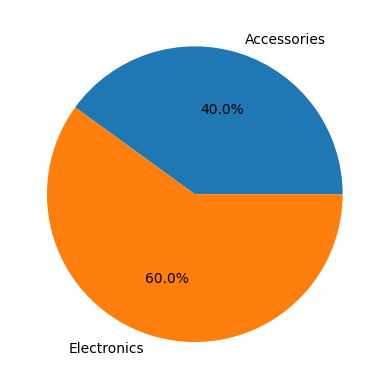

In [10]:
plt.pie(category_demand , labels = category_demand.index , autopct = "%1.1f%%")
plt.show()

In [11]:
category_demand = df.groupby("Category")["Quantity"].sum()
category_demand


Category
Accessories    10
Electronics    10
Name: Quantity, dtype: int64

In [12]:
avg_revenue = df["Revenue"].mean()

df["Customer_Segment"] = df["Revenue"].apply(
    lambda x: "High Value" if x > avg_revenue else "Low Value"
)

df[["Order_ID", "Product", "Revenue", "Customer_Segment"]]


,Order_ID,Product,Revenue,Customer_Segment
0,1001,Laptop,55000,High Value
1,1002,Mobile,40000,High Value
2,1003,Headphones,6000,Low Value
3,1004,Laptop,55000,High Value
4,1005,Mobile,20000,Low Value
5,1006,Keyboard,3000,Low Value
6,1007,Mobile,60000,High Value
7,1008,Laptop,110000,High Value
8,1009,Mouse,3200,Low Value
9,1010,Headphones,2000,Low Value


In [17]:
customer_segment = df["Customer_Segment"].where(df["Customer_Segment"] == "High Value"),df["Product"].unique()
customer_segment

(0    High Value
 1    High Value
 2           NaN
 3    High Value
 4           NaN
 5           NaN
 6    High Value
 7    High Value
 8           NaN
 9           NaN
 Name: Customer_Segment, dtype: object,
 array(['Laptop', 'Mobile', 'Headphones', 'Keyboard', 'Mouse'],
       dtype=object))